##### **Identitas Mahasiswa:**
- Nama  : Triyana Dewi Fatmawati <br/>
- NIM   : 2241720206 <br/>
- Kelas : TI - 3H <br/>
- Nomor : 25 <br/>

---

# Praktikum 1
Klasifikasi Iris dengan Perceptron

#### Deskripsi
Pada pratikum ini, Anda diminta untuk melakukan klasifikasi bunga iris dengan menggunakan model Perceptron. Anda dapat menggunakan dataset iris pada praktikum sebelumnya.

Untuk nambah pemahaman Anda terkait dengan model Perceptron, pada pratkikum ini Anda akan membuat model Perceptron tanpa menggunakan library.

#### **Langkah 1 - Import Library**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#### **Langkah 2 - Load Data dan Visualisasi**

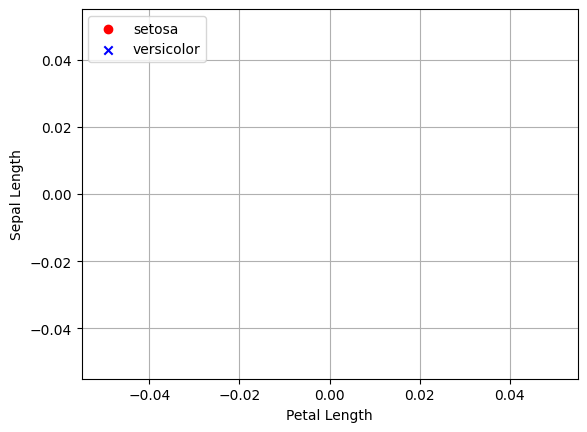

In [3]:
df = pd.read_csv('iris.csv', header=None)
setosa = df[df[4] == 'Iris-setosa']
versicolor = df[df[4] == 'Iris-versicolor']
virginica = df[df[4] == 'Iris-virginica']

a, b = 0, 3
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')
plt.grid()
plt.show()

Agar plotnya muncul perlu dimodifikasi seperti kode program di bawah ini

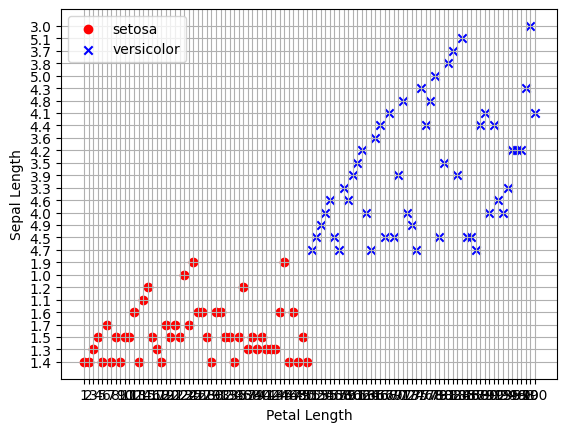

In [4]:
df = pd.read_csv('iris.csv', header=None)
setosa = df[df[5] == 'Iris-setosa']
versicolor = df[df[5] == 'Iris-versicolor']
virginica = df[df[5] == 'Iris-virginica']

a, b = 0, 3
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')
plt.grid()
plt.show()

#### **Langkah 3 - Membuat Kelas Perceptron**

In [5]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

#### **Langkah 4 - Pilih Data dan Encoding Label**

In [6]:
y = df.iloc[0:100, 4].values # pilih 100 data awal
y = np.where(y == 'Iris-setosa', -1, 1) # ganti coding label
X = df.iloc[0:100, [0, 3]].values # slice data latih

Perlu dimodifikasi agar hasil visualisasi nilai error per epoch muncul

In [7]:
y = df.iloc[1:101, 5].values # pilih 100 data awal
y = np.where(y == 'Iris-setosa', -1, 1) # ganti coding label
X = df.iloc[1:101, [1, 3]].values # slice data latih

# Pastikan X dan y adalah numpy array dan tipe datanya benar
X = X.astype(float)  # Mengonversi X ke tipe float jika belum
y = y.astype(int)    # Mengonversi y ke tipe int jika belum

#### **Langkah 5 - Fitting Model**

In [8]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

#### **Langkah 6 - Visualisasi Nilai Error Per Epoch**

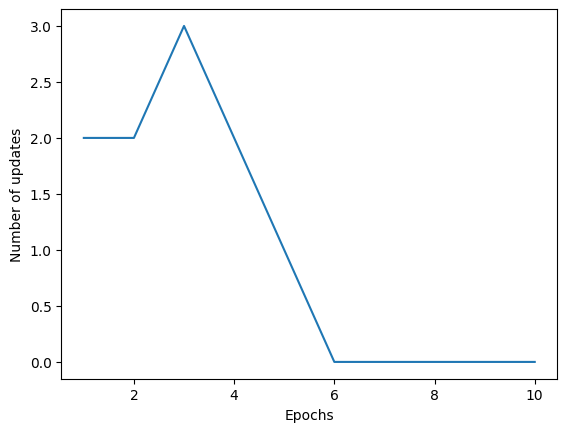

In [9]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

#### **Langkah 7 - Visualiasasi Decision Boundary**

In [12]:
# buat fungsi untuk plot decision region

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # Setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # Plot the decision regions
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    # Predict class labels for the grid
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    # Plot the contour and decision regions
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # Plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=[cmap(idx)], marker=markers[idx], label=cl)

Modifikasi dilakukan untuk kode program di atas sebagai berikut

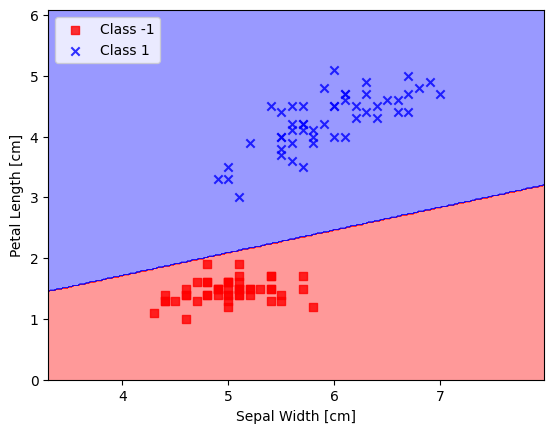

In [13]:
# Fungsi plot decision region
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Plot decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # Plot kontur dan decision region
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot data point
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=[cmap(idx)], marker=markers[idx], label=f'Class {cl}')

    plt.xlabel('Sepal Width [cm]')
    plt.ylabel('Petal Length [cm]')
    plt.legend(loc='upper left')
    plt.show()

# Panggil fungsi plot decision region
plot_decision_regions(X, y, classifier=ppn)